In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def kernal(point,xmat,k):
    m,n=np.shape(xmat)
    weights=np.mat(np.eye((m)))
    for j in range(m):
        diff=point-x[j]
        weights[j,j]=np.exp(diff*diff.T/(-2.0*k**2))
        return weights

In [3]:
def localweight(point,xmat,ymat,k):
    wt=kernal(point,xmat,k)
    w=(x.T*(wt*x)).I*(x.T*wt*ymat.T)
    return w

In [4]:
def localweightregression(xmat,ymat,k):
    m,n=np.shape(xmat)
    ypred=np.zeros(m)
    for i in range(m):
        ypred[i]=xmat[i]*localweight(xmat[i],xmat,ymat,k)
        print(ypred[i])
    return ypred

In [5]:
data=pd.read_csv('Weighted Regression.csv')
data

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [6]:
cola=np.array(data.total_bill)
colb=np.array(data.tip)

In [7]:
cola

array([16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
       14.78])

In [8]:
colb

array([1.01, 1.66, 3.5 , 3.31, 3.61, 4.71, 2.  , 3.12, 1.96, 3.23])

In [9]:
mcola=np.mat(cola)
mcola

matrix([[16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
         14.78]])

In [10]:
mcolb=np.mat(colb)
mcolb

matrix([[1.01, 1.66, 3.5 , 3.31, 3.61, 4.71, 2.  , 3.12, 1.96, 3.23]])

In [11]:
m=np.shape(mcolb)[1]
m

10

In [12]:
one=np.ones((1,m),dtype=int)
one

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [13]:
x=np.hstack((one.T,mcola.T))
print(x.shape)

(10, 2)


In [14]:
x

matrix([[ 1.  , 16.99],
        [ 1.  , 10.34],
        [ 1.  , 21.01],
        [ 1.  , 23.68],
        [ 1.  , 24.59],
        [ 1.  , 25.29],
        [ 1.  ,  8.77],
        [ 1.  , 26.88],
        [ 1.  , 15.04],
        [ 1.  , 14.78]])

In [15]:
ypred=localweightregression(x,mcolb,0.5)
ypred

2.596650074422644
2.0281541805476566
3.2489683818152173
3.554457971073366
3.658576145689438
3.738667049240262
1.8485217254408077
3.9205878158771346
2.565790977580709
2.536145818921245


array([2.59665007, 2.02815418, 3.24896838, 3.55445797, 3.65857615,
       3.73866705, 1.84852173, 3.92058782, 2.56579098, 2.53614582])

In [16]:
xsort=x.copy()
xsort.sort(axis=0)

In [17]:
xsort

matrix([[ 1.  ,  8.77],
        [ 1.  , 10.34],
        [ 1.  , 14.78],
        [ 1.  , 15.04],
        [ 1.  , 16.99],
        [ 1.  , 21.01],
        [ 1.  , 23.68],
        [ 1.  , 24.59],
        [ 1.  , 25.29],
        [ 1.  , 26.88]])

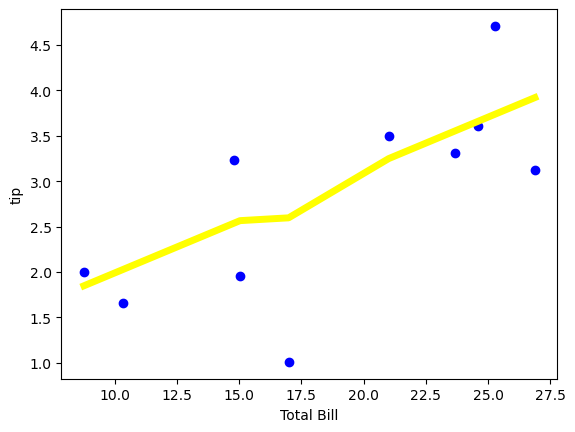

In [18]:
plt.scatter(cola,colb,color='blue')
plt.plot(xsort[:,1],ypred[x[:,1].argsort(0)],color='yellow',linewidth=5)
plt.xlabel('Total Bill')
plt.ylabel('tip')
plt.show()